# Topic Modelling - Visualization

In [3]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import ast

In [4]:
#spark = SparkSession.builder.appName('Topic Modelling - Cleaning - NYT').getOrCreate()
spark = SparkSession \
    .builder \
    .appName('Topic Modelling - Clean#ing - NYT') \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/nyt_db.nyt_coll") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/nyt_db.nyt_coll") \
    .getOrCreate()

spark.sparkContext.setLogLevel('WARN')
sc = spark.sparkContext

# Load Data

In [5]:
nyt_df = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [6]:
#data = pd.read_csv('nyt_cleaned.csv', error_bad_lines=False);
#Loading from mongo
data = nyt_df.toPandas()

In [7]:
doc_clean = data['tokens_final']

In [8]:
doc_clean = map(str, doc_clean) #For mongo

In [9]:
doc_clean1 = [ast.literal_eval(doc) for doc in doc_clean]

In [10]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean1)

In [11]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean1]

# Intertopic Distance Map - Top Most Salient Terms

In [12]:
# Load a potentially pretrained model from disk.
ldamodel = gensim.models.LdaMulticore.load("ldamodel_nyt")

In [13]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [14]:
pyLDAvis.save_html(vis, "nytvis.html")

In [15]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.236771 -0.058708       1        1  7.765235
3     -0.114453 -0.020344       2        1  5.096527
5     -0.016833  0.114062       3        1  4.611181
10     0.094859  0.093087       4        1  4.463570
12    -0.107121 -0.046387       5        1  4.181371
1      0.011346  0.069749       6        1  4.091582
24    -0.040353 -0.002429       7        1  4.001423
0     -0.098680 -0.138045       8        1  3.992785
6     -0.101044  0.035570       9        1  3.961687
15     0.129375 -0.018376      10        1  3.887713
4     -0.064167 -0.018361      11        1  3.851273
13    -0.021467  0.080666      12        1  3.814826
8      0.001956  0.028967      13        1  3.771217
17    -0.005157 -0.015903      14        1  3.729020
19     0.191168 -0.268752      15        1  3.701006
23    -0.002228  0.003554      16        1  3.694905
14     0.084748  0.053175      17        1  3.612922
9      0.064457 -0.076241      18        1  3.554349
20     0.072726  0.047769      19        1  3.518083
16     0.040980  0.002036      20        1  3.505640
21     0.121079  0.054161      21        1  3.477592
2     -0.037006 -0.023602      22        1  3.443681
7     -0.053958  0.008464      23        1  3.436362
18     0.054992  0.085397      24        1  3.433346
22     0.031552  0.010489      25        1  3.402704, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
109   Default   735.000000           day   735.000000  30.0000  30.0000
52    Default  1309.000000     president  1309.000000  29.0000  29.0000
120   Default   475.000000          2019   475.000000  28.0000  28.0000
58    Default  1037.000000         trump  1037.000000  27.0000  27.0000
233   Default   602.000000          help   602.000000  26.0000  26.0000
31    Default   844.000000         state   844.000000  25.0000  25.0000
702   Default   408.000000         start   408.000000  24.0000  24.0000
588   Default   293.000000    collection   293.000000  23.0000  23.0000
118   Default  1048.000000          year  1048.000000  22.0000  22.0000
92    Default   260.000000          fall   260.000000  21.0000  21.0000
1658  Default   248.000000      minister   248.000000  20.0000  20.0000
1659  Default   209.000000         prime   209.000000  19.0000  19.0000
334   Default   349.000000           win   349.000000  18.0000  18.0000
359   Default   221.000000        happen   221.000000  17.0000  17.0000
399   Default   319.000000        school   319.000000  16.0000  16.0000
136   Default   361.000000          meet   361.000000  15.0000  15.0000
279   Default   193.000000        couple   193.000000  14.0000  14.0000
634   Default   270.000000          news   270.000000  13.0000  13.0000
124   Default   356.000000        appear   356.000000  12.0000  12.0000
303   Default   441.000000          city   441.000000  11.0000  11.0000
3530  Default   200.000000         march   200.000000  10.0000  10.0000
519   Default   644.000000          york   644.000000   9.0000   9.0000
117   Default   222.000000       special   222.000000   8.0000   8.0000
144   Default   244.000000     democrats   244.000000   7.0000   7.0000
126   Default   152.000000         print   152.000000   6.0000   6.0000
141   Default   310.000000        border   310.000000   5.0000   5.0000
357   Default   149.000000         ahead   149.000000   4.0000   4.0000
324   Default   143.000000                 143.000000   3.0000   3.0000
513   Default   815.000000          time   815.000000   2.0000   2.0000
4     Default   245.000000          love   245.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
912   Topic25    13.426348          hair    24.298594   2.7874  -6.3150
2345  Topic25    25.342169        church    75.671310   2.2867  -5.6797
4051  

# View Dominant Topics

In [16]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [17]:
def joiner(X):
    return ' '.join(X)
doc_clean_joiner = list(map(joiner,doc_clean1))

In [18]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean_joiner)

In [19]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,20.0,0.9040,"love, modern, amrica, mundo, latina, est, suce...",wife toni tennille successful hitmaking combin...
1,1,18.0,0.3852,"people, woman, capture, life, three, book, vie...",sweden midwife deliver baby doula culture inte...
2,2,18.0,0.2959,"people, woman, capture, life, three, book, vie...",fairness election vote political flash point k...
3,3,3.0,0.6432,"trump, week, health, care, people, house, admi...",national womens law center urge law pas ensure...
4,4,11.0,0.4630,"president, trump, state, border, unite, democr...",tragedies parkland funny reader link comedians...


In [20]:
#Saving the top topics
df_topic_sents_keywords.to_csv('df_topic_sents_keywords.csv', index=False)
df_dominant_topic.to_csv('df_dominant_topic.csv', index=False)

# Most Representative Document

In [21]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([sent_topics_sorteddf_lda, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

sent_topics_sorteddf_lda.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9600,"minister, prime, north, deal, meet, korea, pol...",antizionism form antisemitism michelle special...
1,1.0,0.9644,"school, high, year, find, family, leave, small...",complete hardware hint pink season mens wear p...
2,2.0,0.9520,"trump, weeks, test, president, emergency, decl...",ambitious opinion video project produce three ...
3,3.0,0.9495,"trump, week, health, care, people, house, admi...",choice place spotlight key midwestern battlegr...
4,4.0,0.9543,"european, deal, set, union, state, time, food,...",measles polio set adventure infect cdc conside...


In [22]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

topic_contribution = round(topic_counts/topic_counts.sum(), 4)

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Word Count Distribution

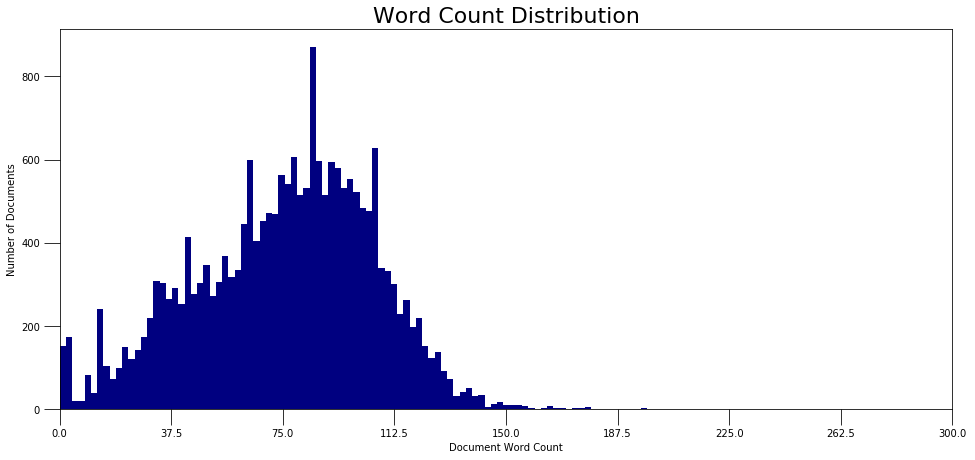

In [23]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7))
plt.hist(doc_lens, bins = 100, color='navy')


plt.gca().set(xlim=(0, 300), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,300,9))
plt.title('Word Count Distribution', fontdict=dict(size=22))
plt.show()


In [24]:
print("Mean   : " + str(round(np.mean(doc_lens))))
print("Median : " + str(round(np.median(doc_lens))))
print( "Stdev   : " + str(round(np.std(doc_lens))))
print("99th percentile  : " + str(round(np.quantile(doc_lens, q=0.99))))

Mean   : 75.0
Median : 79.0
Stdev   : 30.0
99th percentile  : 138.0


# Word Counts by Dominant Topic

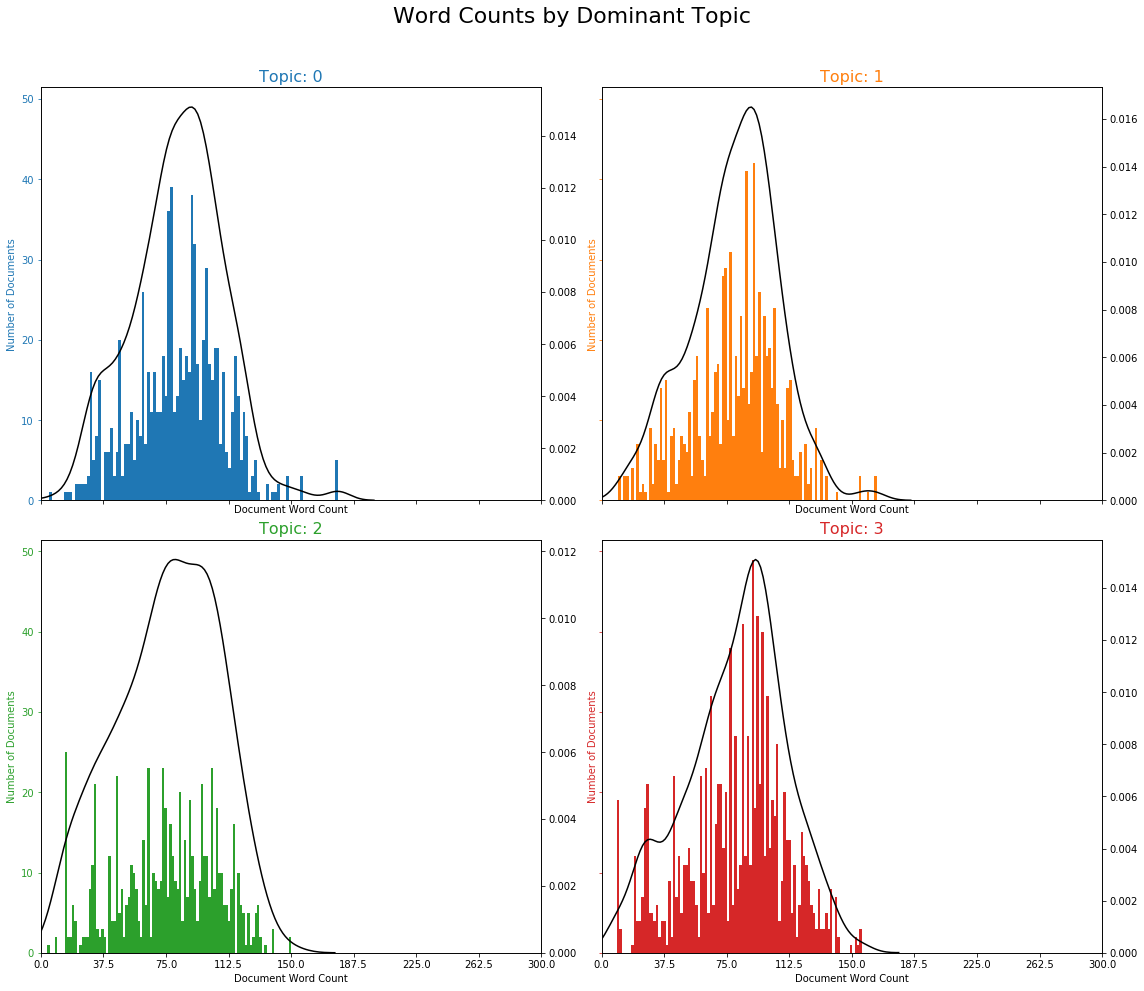

In [25]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 300), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,300,9))
fig.suptitle('Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Wordcloud

In [26]:
def stopwords_read(stopWordsFile):
    f = open(stopWordsFile, "r")
    stopWords = set(f.read().split("\n"))
    return stopWords

stopwords = stopwords_read("stopwords.txt")
stop_words = [word.lower() for word in stopwords] 

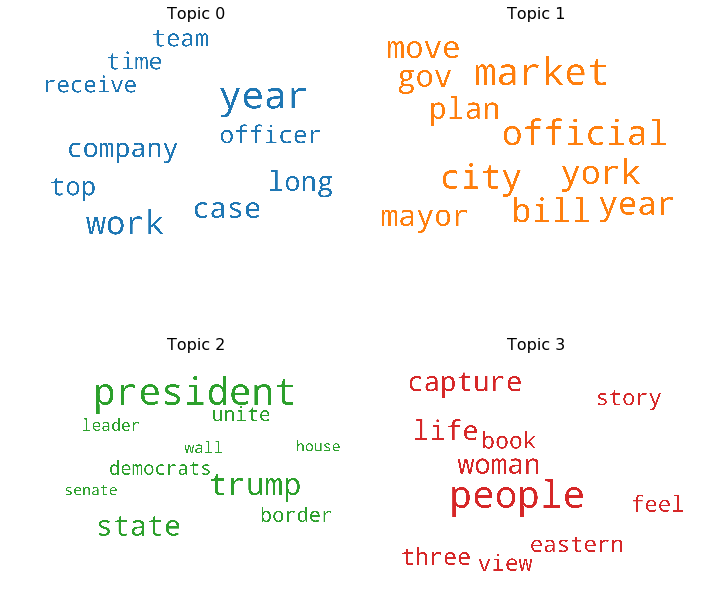

In [27]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='jet',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

---